# Set-Up

In [1]:
import numpy as np
from kagglehub import KaggleDatasetAdapter, dataset_load
from dotenv import load_dotenv
import pandas as pd
from pandas.api.types import CategoricalDtype

In [2]:
_ = load_dotenv()

# Data-Fetching

In [3]:
# Type hint added because dataset_load returns Any, but will return a DataFrame in this case, as we're using the adapter. This is just for convenience from the IDE (auto-complete, typo-checking, etc).
df: pd.DataFrame = dataset_load(
    adapter=KaggleDatasetAdapter.PANDAS,
    handle="miroslavsabo/young-people-survey",
    path="responses.csv",
)

# Exploration

In [4]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    Music                           1007 non-null   float64
 1    Slow songs or fast songs        1008 non-null   float64
 2    Dance                           1006 non-null   float64
 3    Folk                            1005 non-null   float64
 4    Country                         1005 non-null   float64
 5    Classical music                 1003 non-null   float64
 6    Musical                         1008 non-null   float64
 7    Pop                             1007 non-null   float64
 8    Rock                            1004 non-null   float64
 9    Metal or Hardrock               1007 non-null   float64
 10   Punk                            1002 non-null   float64
 11   Hiphop, Rap                     1006 non-null   float64
 12   Reggae, Ska       

Most of the columns actually appear to be integers, and of those, most are Likert (1-5). Some object types are actually strings, which haven't been converted to categorical types, and will need to be done manually, as some are ordinal, and the ordering was probably lost.

# Cleaning

## Simple type conversion

In [6]:
df = df.convert_dtypes()

In [7]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.0,1008.0,1006.0,1005.0,1005.0,1003.0,1008.0,1007.0,1004.0,1007.0,...,1008.0,1008.0,1007.0,1007.0,1010.0,1008.0,1003.0,990.0,990.0,1004.0
mean,4.731877,3.328373,3.11332,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.36147,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.25257,1.260845,1.1614,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.28497,1.09375,2.82884,10.024505,13.839561,1.013348
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,15.0,62.0,41.0,0.0
25%,5.0,3.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,19.0,167.0,55.0,1.0
50%,5.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,2.0,...,3.0,3.0,3.0,3.0,3.0,4.0,20.0,173.0,64.0,1.0
75%,5.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,5.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,22.0,180.0,75.0,2.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,30.0,203.0,165.0,10.0


In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    Music                           1007 non-null   Int64 
 1    Slow songs or fast songs        1008 non-null   Int64 
 2    Dance                           1006 non-null   Int64 
 3    Folk                            1005 non-null   Int64 
 4    Country                         1005 non-null   Int64 
 5    Classical music                 1003 non-null   Int64 
 6    Musical                         1008 non-null   Int64 
 7    Pop                             1007 non-null   Int64 
 8    Rock                            1004 non-null   Int64 
 9    Metal or Hardrock               1007 non-null   Int64 
 10   Punk                            1002 non-null   Int64 
 11   Hiphop, Rap                     1006 non-null   Int64 
 12   Reggae, Ska                     

## Rebuilding categories

The string-typed columns will need to be checked for the values they contain. There are only 11, so a hybrid eyeballing is optimal.

In [9]:
print(
    df.select_dtypes(include="string")
        .apply(
            lambda col: f"{col.name}\n" + "\n".join(f"  {v}" for v in col.unique())
        )
        .str
        .cat(sep="\n\n")
)

Smoking
  never smoked
  tried smoking
  former smoker
  current smoker
  <NA>

Alcohol
  drink a lot
  social drinker
  never
  <NA>

Punctuality
  i am always on time
  i am often early
  i am often running late
  <NA>

Lying
  never
  sometimes
  only to avoid hurting someone
  everytime it suits me
  <NA>

Internet usage
  few hours a day
  most of the day
  less than an hour a day
  no time at all

Gender
  female
  male
  <NA>

Left - right handed
  right handed
  left handed
  <NA>

Education
  college/bachelor degree
  secondary school
  primary school
  masters degree
  doctorate degree
  currently a primary school pupil
  <NA>

Only child
  no
  yes
  <NA>

Village - town
  village
  city
  <NA>

House - block of flats
  block of flats
  house/bungalow
  <NA>


The columns appear to be very clean. The only issue is most of these columns are obviously ordinal, and that information was lost, so it has to be manually defined.

In [10]:
df["Smoking"] = df["Smoking"].astype(CategoricalDtype(
    categories=[
        "never smoked",
        "tried smoking",
        "former smoker",
        "current smoker",
    ],
    ordered=True,
))

df["Alcohol"] = df["Alcohol"].astype(CategoricalDtype(
    categories=[
        "never",
        "social drinker",
        "drink a lot",
    ],
    ordered=True,
))

df["Punctuality"] = df["Punctuality"].astype(CategoricalDtype(
    categories=[
        "i am often running late",
        "i am often early",
        "i am always on time",
    ],
    ordered=True,
))

df["Lying"] = df["Lying"].astype(CategoricalDtype(
    categories=[
        "never",
        "sometimes",
        "only to avoid hurting someone",
        "everytime it suits me",
    ],
    ordered=True,
))

df["Internet usage"] = df["Internet usage"].astype(CategoricalDtype(
    categories=[
        "no time at all",
        "less than an hour a day",
        "few hours a day",
        "most of the day",
    ],
    ordered=True,
))

df["Gender"] = df["Gender"].astype(CategoricalDtype(
    categories=[
        "female",
        "male",
    ],
    ordered=False,
))

df["Left - right handed"] = df["Left - right handed"].astype(CategoricalDtype(
    categories=[
        "left handed",
        "right handed",
    ],
    ordered=False,
))

df["Education"] = df["Education"].astype(CategoricalDtype(
    categories=[
        "currently a primary school pupil",
        "primary school",
        "secondary school",
        "college/bachelor degree",
        "masters degree",
        "doctorate degree",
    ],
    ordered=True,
))

df["Only child"] = df["Only child"].astype(CategoricalDtype(
    categories=[
        "no",
        "yes",
    ],
    ordered=False,
))

df["Village - town"] = df["Village - town"].astype(CategoricalDtype(
    categories=[
        "village",
        "city",
    ],
    ordered=False,
))

df["House - block of flats"] = df["House - block of flats"].astype(CategoricalDtype(
    categories=[
        "block of flats",
        "house/bungalow",
    ],
    ordered=False,
))

In [11]:
df.select_dtypes("category").describe()

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


In [12]:
df.select_dtypes("category").info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Smoking                 1002 non-null   category
 1   Alcohol                 1005 non-null   category
 2   Punctuality             1008 non-null   category
 3   Lying                   1008 non-null   category
 4   Internet usage          1010 non-null   category
 5   Gender                  1004 non-null   category
 6   Left - right handed     1007 non-null   category
 7   Education               1009 non-null   category
 8   Only child              1008 non-null   category
 9   Village - town          1006 non-null   category
 10  House - block of flats  1006 non-null   category
dtypes: category(11)
memory usage: 12.7 KB


## Filling NA for clustering

### Splitting column types for different fill methods

In [13]:
# Integer columns that are non-Likert.
integer_cols = ["Age", "Height", "Weight", "Number of siblings"]

# Integer columns that are Likert.
likert_cols = df.select_dtypes("number").columns.difference(integer_cols)

category_cols = [c for c in df.columns if isinstance(df[c].dtype, CategoricalDtype)]

ordinal_cols = [c for c in category_cols if df[c].dtype.ordered]

nominal_cols = list(set(category_cols).difference(ordinal_cols))

### Fill based on column type

In [14]:
# We might want to revisit this to fill base on gender.

# Note: Converts all int columns to float columns.
# This allows for interpolated values.
df[integer_cols] = df[integer_cols]\
    .astype(float)\
    .fillna(df[integer_cols].median())

# Note: Converts all likert columns to float columns.
# This allows for interpolated values.
# We should consider probabilistic median rounding if normal rounding proves to be an issue.
df[likert_cols] = df[likert_cols]\
    .astype(float)\
    .fillna(df[likert_cols].median())

# Fill NA with the median response for each ordinal category, treating ordinals numerically.
df[ordinal_cols] = df[ordinal_cols].fillna(
    df[ordinal_cols].apply(
        lambda c: c.cat.categories[
            round(c.cat.codes.replace(-1, np.nan).median())
        ]
    )
)

df[nominal_cols] = df[nominal_cols].fillna(df[nominal_cols].mode().iloc[0])

### Check for NA

In [15]:
df.isna().sum().sum().item()

0

### Transforming Categorical into Numerical varibles for Clustering

In [44]:
smoking_map = {
    'never smoked': 1,
    'tried smoking': 2,
    'former smoker': 3,
    'current smoker': 4
}

alcohol_map = {
    'never': 1,
    'social drinker': 2,
    'drink a lot': 3
}

punctuality_map = {
    'i am often early': 1,
    'i am always on time': 2,
    'i am often running late': 3
}

lying_map = {
    'never': 1,
    'only to avoid hurting someone': 2,
    'sometimes': 3,
    'everytime it suits me': 4
}

internet_map = {
    'no time at all': 1,
    'less than an hour a day': 2,
    'few hours a day': 3,
    'most of the day': 4
}

education_map = {
    'currently a primary school pupil': 1,
    'primary school': 2,
    'secondary school': 3,
    'college/bachelor degree': 4,
    'masters degree': 5,
    'doctorate degree': 6
}

gender_map = {'female': 0, 'male': 1}
handed_map = {'right handed': 0, 'left handed': 1}
child_map = {'no': 0, 'yes': 1}
village_map = {'village': 0, 'city': 1}
house_map = {'block of flats': 0, 'house/bungalow': 1}

df['Smoking'] = df['Smoking'].map(smoking_map)
df['Alcohol'] = df['Alcohol'].map(alcohol_map)
df['Punctuality'] = df['Punctuality'].map(punctuality_map)
df['Lying'] = df['Lying'].map(lying_map)
df['Internet usage'] = df['Internet usage'].map(internet_map)
df['Education'] = df['Education'].map(education_map)

df['Gender'] = df['Gender'].map(gender_map)
df['Left - right handed'] = df['Left - right handed'].map(handed_map)
df['Only child'] = df['Only child'].map(child_map)
df['Village - town'] = df['Village - town'].map(village_map)
df['House - block of flats'] = df['House - block of flats'].map(house_map)

cols_to_check = [
    'Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
    'Education', 'Gender', 'Left - right handed', 'Only child',
    'Village - town', 'House - block of flats'
]


## Clustering

#### K-Means

##### Elbow Method - Determining the optimal number of clusters


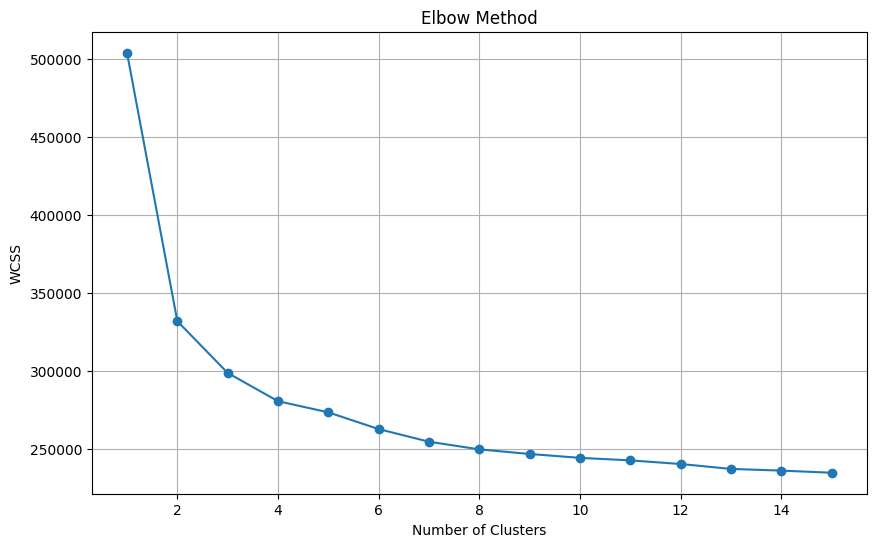

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
check_range = range(1, 16)

for i in check_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(check_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Exploring K = 5

/tmp/ipython-input-1160584031.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = clusters


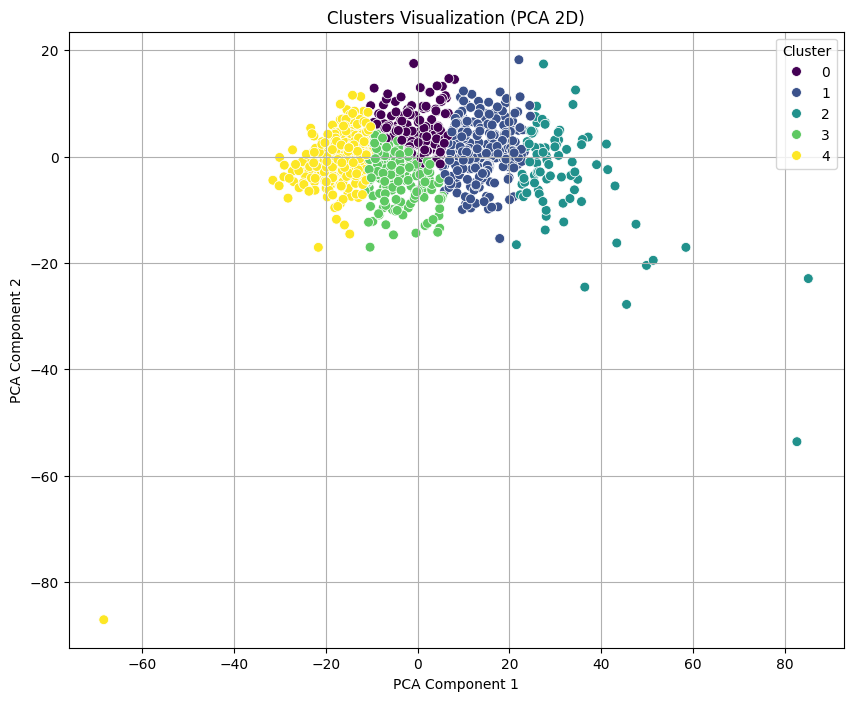

Cluster
0    148
1    249
2     83
3    227
4    303
Name: count, dtype: int64


In [46]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# K- Means 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

df['Cluster'] = clusters

# PCA 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Clusters Visualization (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print(df['Cluster'].value_counts().sort_index())

--- Profile ---
            Music  Slow songs or fast songs     Dance      Folk   Country  \
Cluster                                                                     
0        4.837838                  3.310811  3.013514  2.060811  1.966216   
1        4.622490                  3.413655  3.120482  2.192771  2.248996   
2        4.662651                  3.590361  3.120482  2.313253  2.216867   
3        4.731278                  3.286344  3.202643  2.484581  2.048458   
4        4.792079                  3.224422  3.085809  2.320132  2.125413   

         Classical music   Musical       Pop      Rock  Metal or Hardrock  \
Cluster                                                                     
0               2.777027  2.459459  3.385135  3.891892           2.405405   
1               2.895582  2.473896  3.333333  3.722892           2.542169   
2               3.180723  2.385542  3.192771  3.879518           2.975904   
3               2.925110  2.969163  3.625551  3.744493     

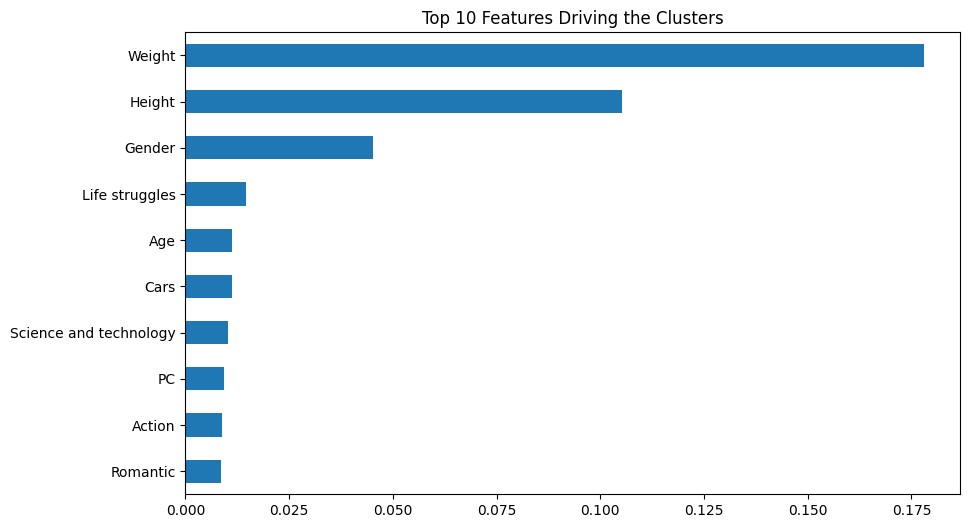

In [47]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1. Profile of the different clusters
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
profile = df.groupby('Cluster')[numeric_cols].mean()
print(profile)

# 2. Ranking cluster importance (know what separate them)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

#print("Top 10 features")
#print(top_features)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Features Driving the Clusters')
plt.gca().invert_yaxis()
plt.show()

##### I do not think weight and height would influence that much on a investment profile

--- Top 25 Important Features ---
Shopping             0.021744
Reading              0.020133
Romantic             0.019898
Life struggles       0.017835
Theatre              0.016295
PC                   0.016148
Cars                 0.015988
Classical music      0.015803
Art exhibitions      0.014842
Dancing              0.014470
Swing, Jazz          0.014207
Adrenaline sports    0.013871
Storm                0.012891
Western              0.012833
Rock n roll          0.012269
Action               0.012197
Documentary          0.011148
Physics              0.010966
Politics             0.010529
Rats                 0.010207
Darkness             0.010171
History              0.010171
Musical              0.010017
Spiders              0.009964
War                  0.009922
dtype: float64


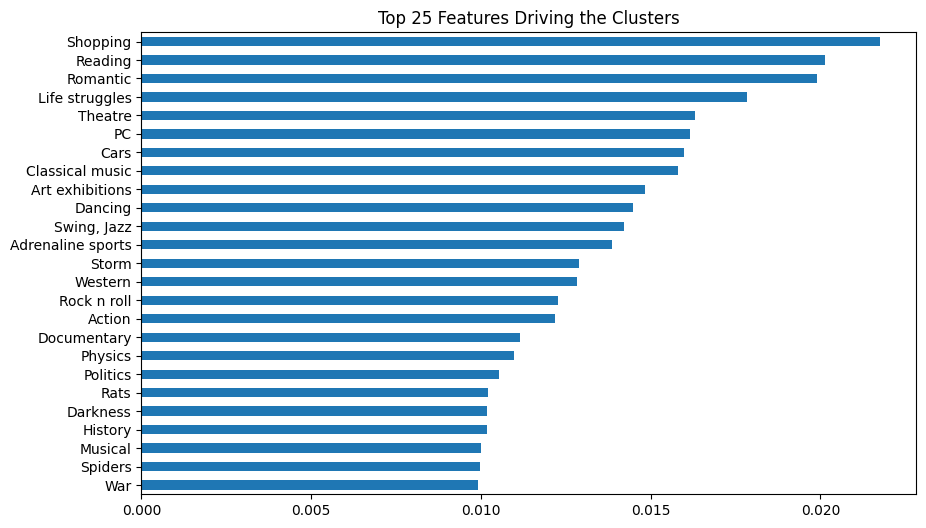

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

cols_to_drop = ['Height', 'Weight', 'Gender', 'Left - right handed']
df_finance = df.drop(columns=cols_to_drop, errors='ignore')

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_finance), columns=df_finance.columns)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = clusters

X = df_scaled.drop('Cluster', axis=1)
y = df_scaled['Cluster']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(25)

print("--- Top 25 Important Features ---")
print(top_features)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 25 Features Driving the Clusters')
plt.gca().invert_yaxis()
plt.show()

### Looking the means of each cluster so we can get a profile for each of them

In [49]:

rf = RandomForestClassifier(random_state=42)
X = df_scaled.drop('Cluster', axis=1)
y = df_scaled['Cluster']
rf.fit(X, y)

# Top 20 list
top_20 = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20).index.tolist()
df_finance['Cluster'] = clusters
# .T lines become columns
profile_means = df_finance.groupby('Cluster')[top_20].mean().T

print("--- Average Values for Top 20 Features by Cluster ---")
print(profile_means)

--- Average Values for Top 20 Features by Cluster ---
Cluster                   0         1         2         3         4
Shopping           4.033333  3.297674  2.436275  4.162437  2.602804
Reading            4.033333  3.581395  3.637255  2.639594  2.018692
Romantic           4.233333  3.544186  3.127451  4.065990  2.630841
Life struggles     3.983333  2.730233  3.151961  3.614213  1.883178
Theatre            3.761111  3.655814  3.063725  2.700508  2.032710
PC                 2.588889  3.623256  2.696078  2.644670  3.976636
Cars               2.083333  3.181395  1.867647  2.507614  3.649533
Classical music    3.133333  3.720930  3.406863  2.086294  2.411215
Art exhibitions    3.188889  3.306977  2.671569  2.020305  1.794393
Dancing            3.211111  3.018605  1.887255  2.675127  1.616822
Swing, Jazz        3.233333  3.474419  2.818627  1.939086  2.350467
Adrenaline sports  2.788889  3.553488  2.098039  2.598985  3.607477
Storm              2.788889  1.758140  1.774510  2.309645  1.3

### Profile
I asked Gemini to give me 5 different profiles based on the means we have above:

**Cluster 0 Profile:** Cultured, sensitive, and emotional. -> Why: High scores in Reading, Theatre, and Art, combined with high Life Struggles and Shopping. Investment Profile: Moderate Risk / Purpose-Driven. Needs "locked" assets to prevent impulsive spending or assets with aesthetic value. (e.g., ESG Funds, Art Funds, Pension Plans).

 **Cluster 1 Profile:**  Rational, academic, and stable. -> Why: Dominated by complex interests like Politics, Physics, Documentaries, and Classical Music. Very low anxiety levels.
Investment Profile: Moderate-High Risk / Strategic. Focuses on fundamentals, efficiency, and long-term rationality. (e.g., Value Stocks, Global ETFs, REITs).

**Cluster 2 Profile:** Frugal, low-profile, and cautious. -> Why: Lowest scores in all consumption categories (Shopping, Cars) and social energy (Adrenaline, Dancing).
Investment Profile: Low Risk / Conservative. Priority is capital preservation and safety above all else. (e.g., Government Bonds, Fixed Income/CDs, Gold).

**Cluster 3 Profile:** Mainstream, trendy, and anxious. -> Why: High interest in Shopping and Romantic themes. Low interest in complex topics. High Life Struggles.
Investment Profile: Moderate Risk / Trend Follower. Needs simple UX and familiar brand names. (e.g., Robo-Advisors, Big Tech Stocks like Apple/Netflix, Thematic Funds).

**Cluster 4 Profile:** Practical, energetic, and thrill-seeker. -> Why: Highest interest in PC, Cars, Action Movies, and Adrenaline Sports. Lowest level of Life Struggles.
Investment Profile: Very High Risk / Speculator. Seeks high returns, volatility, and technology. (e.g., Crypto & Altcoins, Small Caps, Options Trading).

## Checking new people in to the model

##### 5-8 features seems to be enough to do a prediction


In [55]:

cluster_profiles = {
    0: "Cluster 0",
    1: "Cluster 1",
    2: "Cluster 2",
    3: "Cluster 3",
    4: "Cluster 4"
}
df_finance = df_finance.astype(float)
def predict_user_profile(user_answers):
    """
    Creates a dummy user with median values for all 140 columns,
    We may take this variables out
    updates with specific user answers, scales the data, and predicts the cluster.
    """
    #take only the non categorical variables
    df_numeric = df_finance.select_dtypes(include=[np.number])


    # used 'df_finance' because it has the clean data but original 1-5 scale
    new_person = df_finance.median().to_frame().T

    # 2. Update only the questions answered by the user
    for feature, value in user_answers.items():
        if feature in new_person.columns:
            new_person[feature] = value
        else:
            print(f"Warning: Feature '{feature}' not found in the model.")


    # used the scaler to standardize
    #This converts the 1-5 inputs to the z-score format the model expects
    new_person_scaled = scaler.transform(new_person)

    # Predict the cluster using the trained KMeans
    prediction = kmeans.predict(new_person_scaled)[0]



    print(f"Predicted Cluster ID: {prediction}")
    print(f"Assigned Profile: {cluster_profiles[prediction]}")

    return prediction

# Expectation: Should be Cluster 1
user_a = {
    'Reading': 5,
    'Politics': 5,
    'Physics': 5,
    'Documentary': 5,
    'Classical music': 5,
    'Shopping': 1,
    'Action': 1
}


# Expectation: Should be Cluster 4
user_b = {
    'PC': 5,
    'Cars': 5,
    'Adrenaline sports': 5,
    'Action': 5,
    'Reading': 1,
    'Theatre': 1
}

user_c = {
    # Cluster 1 Traits
    'Reading': 5,
    'Politics': 5,
    'Documentary': 5,
    # Cluster 4 Traits
    'Adrenaline sports': 5,
    'Cars': 5,
    'Action': 5,
    # Cluster 3 Traits
    'Shopping': 5,
    # Neutral on the rest
    'Life struggles': 3
}





predict_user_profile(user_a)
predict_user_profile(user_b)
predict_user_profile(user_c)

Predicted Cluster ID: 1
Assigned Profile: Cluster 1
Predicted Cluster ID: 4
Assigned Profile: Cluster 4
Predicted Cluster ID: 1
Assigned Profile: Cluster 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


np.int32(1)

## Saving the model and scaler


In [56]:
import joblib
from google.colab import files

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
files.download('kmeans_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>